In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_numeric_dtype

import warnings

warnings.filterwarnings('ignore')

sns.set()

%matplotlib inline

In [2]:
abalone = pd.read_csv('abalone.csv', sep=',')

In [3]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
#From the description of the dataset the ring shows the age of the abalone. 
#As state in the description the calculationg the ring is a boring and time-consuming task. 
#We will try to make analysis on the rings to see if we finda anything interesting.

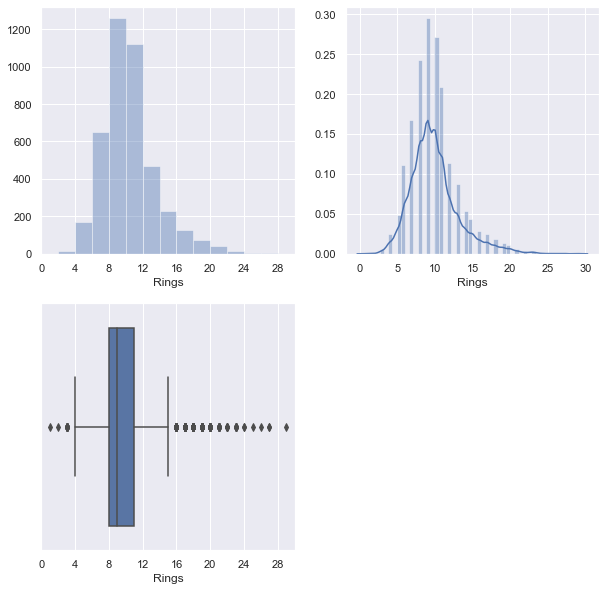

In [8]:
rows = 2
cols = 2
i=0
plt.figure(figsize=(cols * 5, rows * 5))

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.distplot(abalone['Rings'], kde=False, bins=range(0, 31, 2))

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Rings'])

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.boxplot(abalone['Rings'])

In [10]:
#We will try to analyze the attributes that represents the dimensions of an abalone. These attributes are Lenght, Diameter and Height.

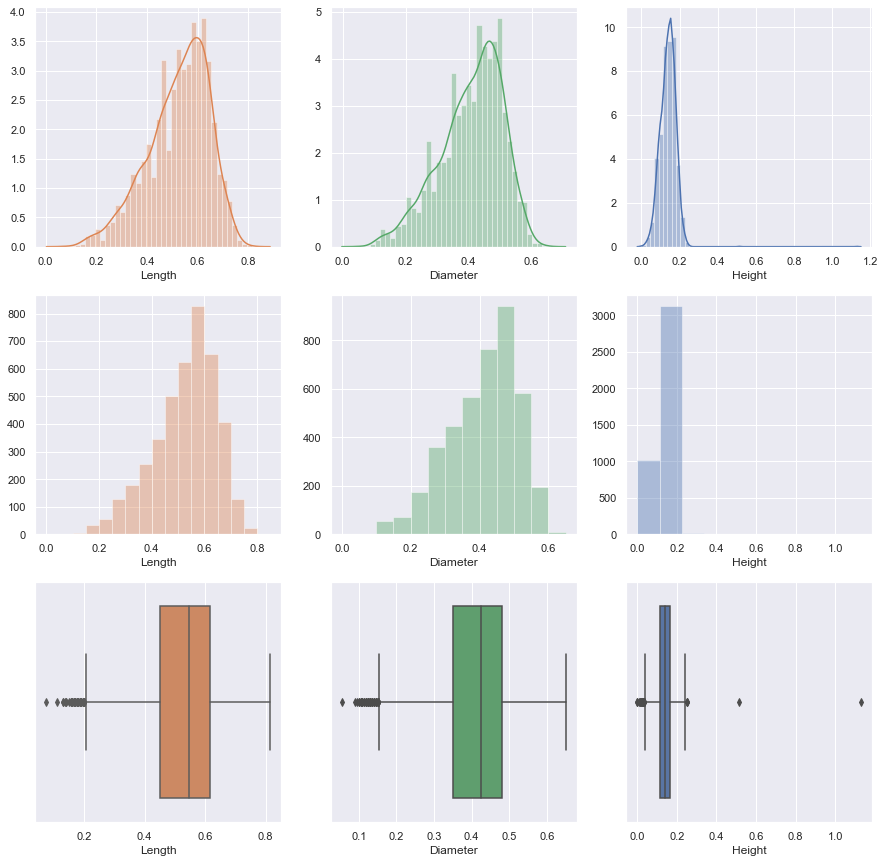

In [11]:
plt.figure(figsize=(15, 15))

colors = sns.color_palette()

lines = 3
rows = 3
i = 0

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Length'], color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Height'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Length'], kde=False, bins=np.arange(0.0, 0.9, 0.05), color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Diameter'], kde=False, bins=np.arange(0.0, 0.7, 0.05), color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Height'], kde=False, bins=10, color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(abalone['Length'], color=sns.color_palette()[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(abalone['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(abalone['Height'], color=colors[i % 3])

#We can see there are outliers from the height boxplot. It needs to be remove if we want to perform machine learning stuff like prediction on this dataset.

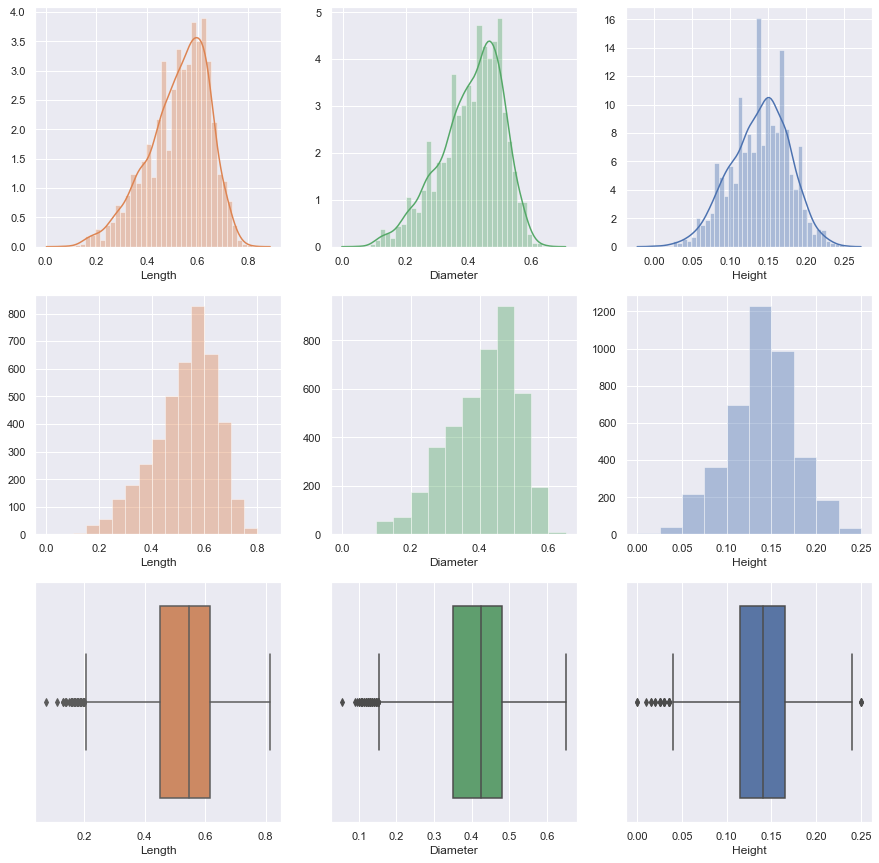

In [12]:
# removing outliers 
abalone = abalone[abalone['Height'] < 0.4]

plt.figure(figsize=(15, 15))

colors = sns.color_palette()

lines = 3
rows = 3
i = 0

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Length'], color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Height'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Length'], kde=False, bins=np.arange(0.0, 0.9, 0.05), color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Diameter'], kde=False, bins=np.arange(0.0, 0.7, 0.05), color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Height'], kde=False, bins=10, color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(abalone['Length'], color=sns.color_palette()[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(abalone['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(abalone['Height'], color=colors[i % 3])

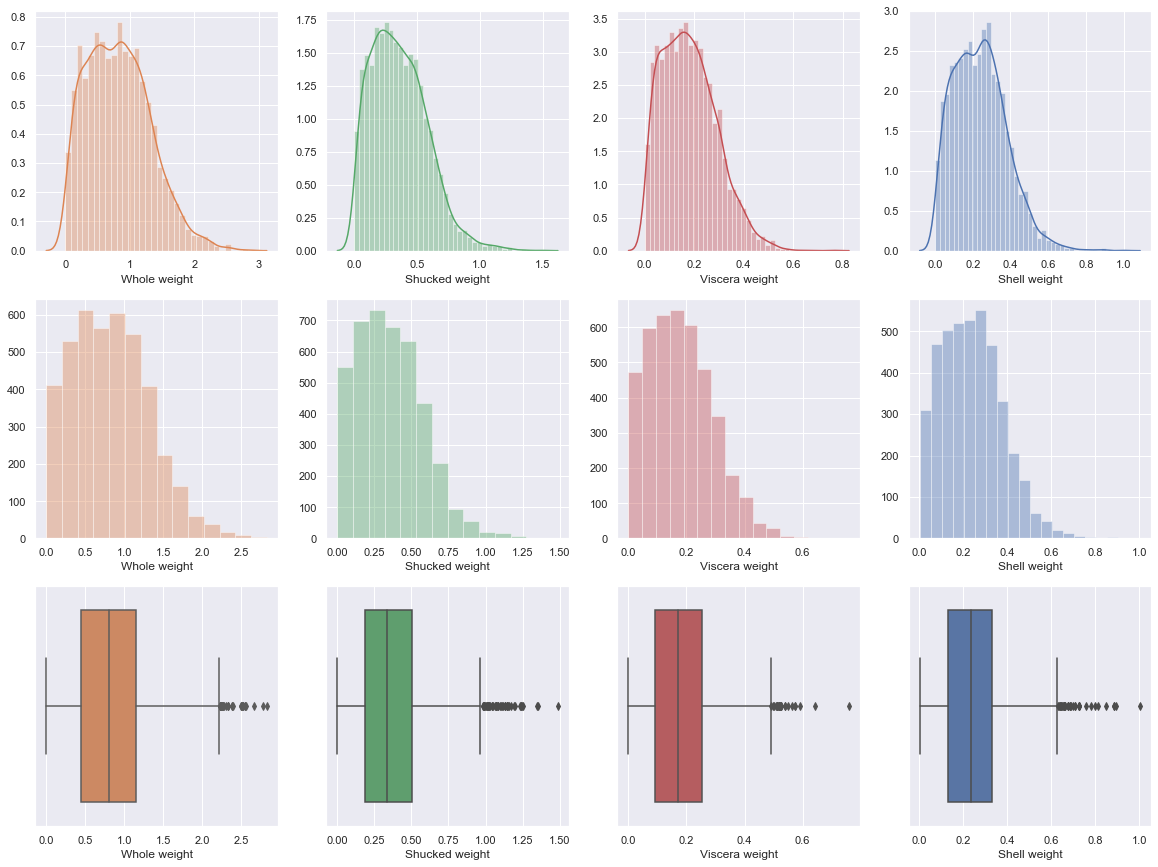

In [13]:
#The weight attributes were analyzed following a similar approach to the Size attributes analysis.

plt.figure(figsize=(20, 15))

colors = sns.color_palette()

rows = 3
cols = 4
i = 0

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Whole weight'], color=colors[i % cols])
    
i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Shucked weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Viscera weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Shell weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Whole weight'], kde=False, bins=14, color=colors[i % cols])
    
i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Shucked weight'], kde=False, bins=14, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Viscera weight'], kde=False, bins=16, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Shell weight'], kde=False, bins=20, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone['Whole weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone['Shucked weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone['Viscera weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone['Shell weight'], color=colors[i % cols])

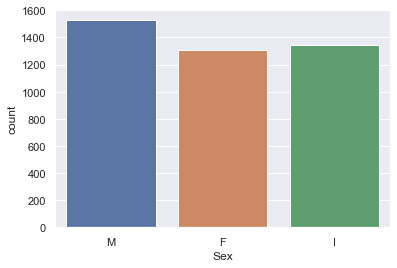

In [15]:
# Sex attribute is a categorical variable which are: M for Male, F for Female and I of Infant.
# The count of each category is analyzed with a bar plot. 

sns.countplot(abalone.Sex)
#We can see that the dataset is balanced.

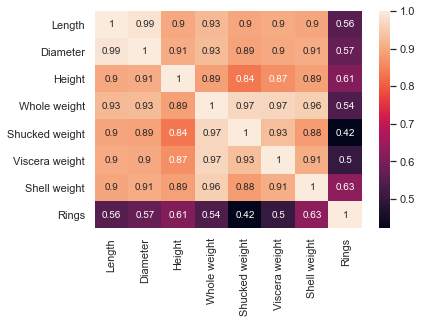

In [19]:
#Analyzing how the dataset attributes are related and how the independent variables influences the target variable.
corr = abalone.corr()
sns.heatmap(corr, annot=True)
# We can see that Height and Shell weight are highly correlated to Rings. Thus, we will concentrated on the 2 attribute with Rings.

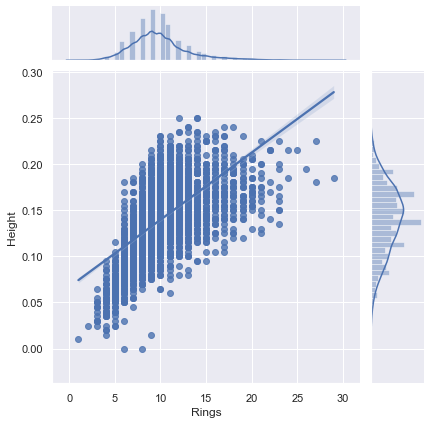

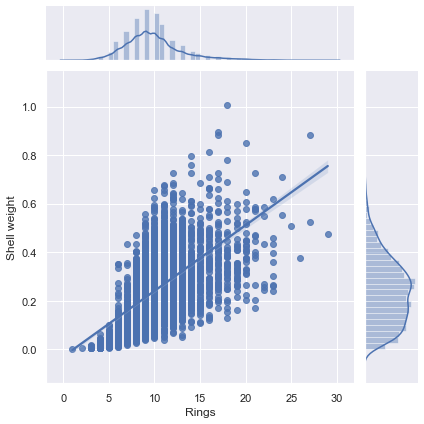

In [21]:
sns.jointplot(data=abalone, x='Rings', y='Height', kind='reg')
sns.jointplot(data=abalone, x='Rings', y='Shell weight', kind='reg')
#We notice a patterns which is for lower values of Rings we have concentrated values of Height and Shell weight.
#As the value of Rings increases, the scatterplot becames larger, and for the highest values of Rings it become disperse.